<a href="https://colab.research.google.com/github/gshartnett/introAI/blob/main/lectures/Week_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Modern AI - Week 3 Notebook
Gavin Hartnett  
PRGS, Winter Quarter 2022

In [ ]:
## imports
import numpy as np
#from numpy.random import default_rng
#rng = default_rng(123)
np.random.seed(123)

import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn import neighbors

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## some commands to make the plots look nicer
plt.style.use('seaborn-white')
matplotlib.rcParams.update({'font.size': 16})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## $L^p$ Distance Metrics

Let's plot the unit circle for the different $L^p$ norms:

$$ r = \sqrt[p]{|x_1|^p + |x_2|^p} \,. $$

In [ ]:
## grab the color cycle so that we can manually assign colors to the 
## different curves
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

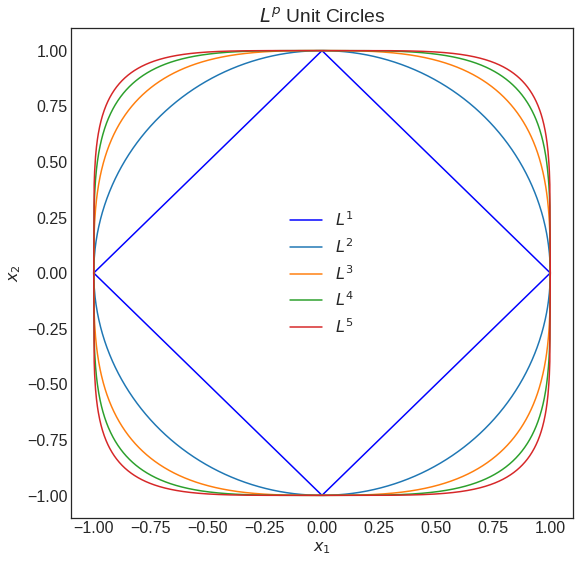

In [ ]:
## plot the unit "circle" for the different L^p norms

x1 = np.linspace(-1, 1, 1000)

fig, ax = plt.subplots(figsize=(9,9))

#p=1
ax.plot(x1, (1-np.abs(x1)), color='b', label=r'$L^1$')
ax.plot(x1, -(1-np.abs(x1)), color='b')

for i in range(4):
    p = i + 2
    ax.plot(x1, np.power(1-np.abs(x1)**p, 1/p), color=colors[i], label=r'$L^%i$' %p)
    ax.plot(x1, -np.power(1-np.abs(x1)**p, 1/p), color=colors[i])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.title(r'$L^p$ Unit Circles')
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/Lp_circle.pdf')
plt.show()

---
## $k$-Nearest Neighbors

In [ ]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
     Function taken from: https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points, dtype=int),np.ones(n_points, dtype=int))))

N = 200
X, y = twospirals(N)

In [ ]:
## collect the data in a dataframe
df = pd.DataFrame(np.concatenate((X, y[:,None]), axis=1), columns=["x1", "x2", "y"])
df.head(5)

,x1,x2,y
0,-3.790326,-10.382197,0.0
1,-3.907411,6.263633,0.0
2,-6.027019,1.759770,0.0
3,8.336374,-6.225247,0.0
4,-5.667234,-9.379407,0.0


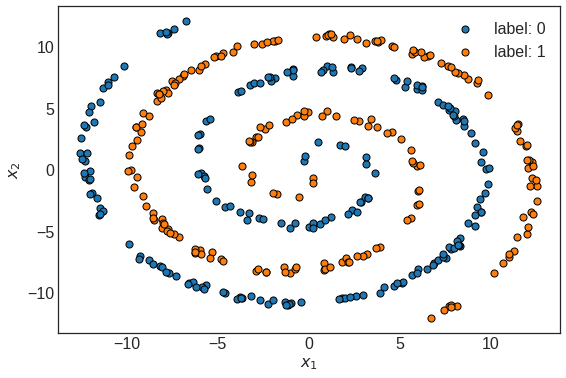

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
for c in range(max(y)+1):
    plt.scatter(X[y==c,0], X[y==c,1], edgecolor="black", s=50, label='label: %i' %c)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/spiral.pdf')
plt.show()

In [ ]:
## build and fit the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
print('Accuracy: %.2f' % (100*np.mean(knn.predict(X) == y)))

Accuracy: 100.00


Plot the decision boundary

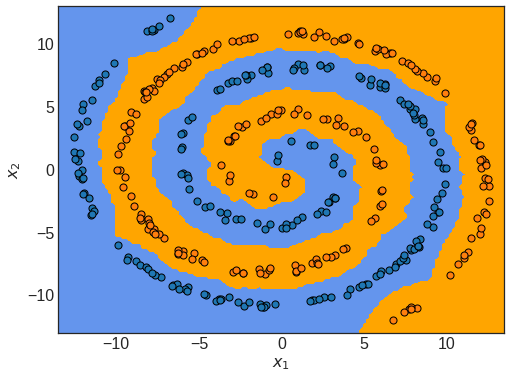

In [ ]:
# Create color maps
cmap_light = ListedColormap(["cornflowerblue", "orange"])

## Plot the decision boundary. 
## inspired by: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

## build a mesh
h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

## plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

## add the training points
for c in range(max(y)+1):
    plt.scatter(X[y==c,0], X[y==c,1], edgecolor="black", s=50, label='label: %i' %c)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/knn_spiral_k5.pdf')
plt.show()

Next, let's explore the effect of varying the neighborhood size, $k$. It turns out that this isn't the best dataset to visualize this difference, so let's first introduce another dataset:

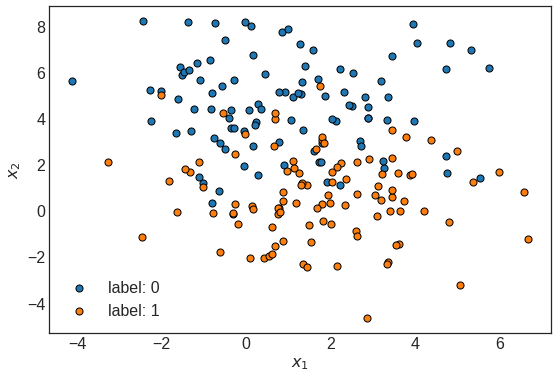

In [ ]:
## generate the data
from sklearn.datasets import make_blobs
p = 2
N = 200
X, y = make_blobs(n_samples=N, centers=p, n_features=2, cluster_std=2.0, random_state=0)

## collect the data in a dataframe
df = pd.DataFrame(np.concatenate((X, y[:,None]), axis=1), columns=["x1", "x2", "y"])
df.head(5)

## plot the data
fig, ax = plt.subplots(figsize=(9,6))
for c in range(max(y)+1):
    plt.scatter(X[y==c,0], X[y==c,1], edgecolor="black", s=50, label='label: %i' %c)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

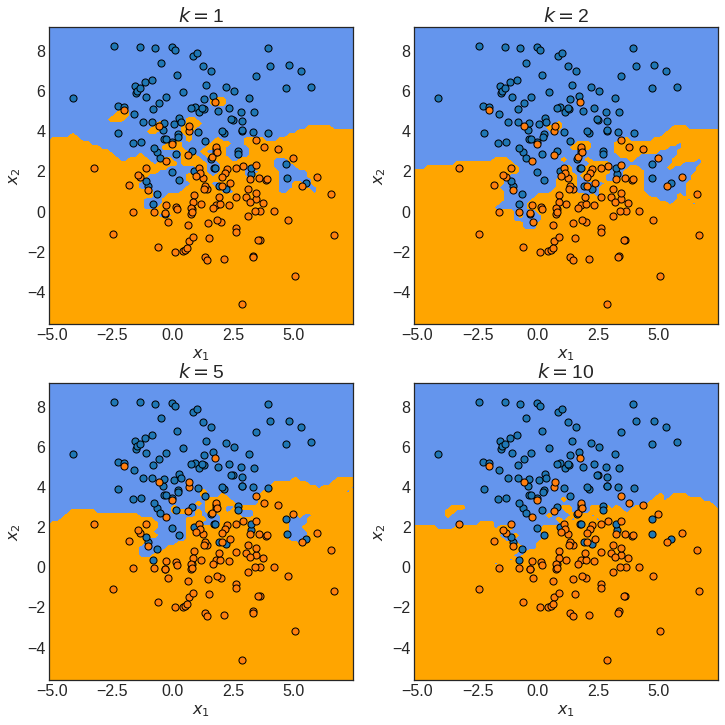

In [ ]:
klist = [1, 2, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes = axes.flatten()

## build a mesh
h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

## loop over k
for i in range(len(klist)):
    k = klist[i]
    ax = axes[i]

    ## build and fit the model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    ## plot the decision boundary
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)

    ## add the training points
    for c in range(max(y)+1):
        ax.scatter(X[y==c,0], X[y==c,1], edgecolor="black", s=50, label='label: %i' %c)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title(r'$k = $%i' %k)

plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/knn_spiral_multik.pdf',
            bbox_inches='tight', pad_inches=0)
plt.show()

## Regularization

In [ ]:
## imports
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
## let's load an example dataset from the scikit-learn (sklearn) library
dataset = sklearn.datasets.load_diabetes()

In [ ]:
## extract the (X,Y)'s
X = dataset.data
y = dataset.target

## define the dimensions of the data
N = X.shape[0]
p = X.shape[1]

## shuffle the data
## this is just good practice
permutation = np.arange(N)
np.random.shuffle(permutation) #this is an in-place operation

X = X[permutation,:]
y = y[permutation]

## for the logistic regression to converge we need to scale the data
## see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
## for more details if you're curious
scaler = StandardScaler()
X  = scaler.fit_transform(X)

In [ ]:
## split the data into a train, validation, and test set
Ntrain = int(0.6 * N)
Nval = int(0.2 * N) 
Ntest = N - Ntrain - Nval

X_train = X[:Ntrain]
y_train = y[:Ntrain]

X_val = X[Ntrain: (Ntrain + Nval)]
y_val = y[Ntrain: (Ntrain + Nval)]

X_test = X[(Ntrain + Nval):]
y_test = y[(Ntrain + Nval):]

In [ ]:
lambda_list = np.exp(np.linspace(np.log(0.1), np.log(100), 1000))
train_loss = []
val_loss = []

## for each lambda value, fit a new model
for i in range(len(lambda_list)):
    ## fit the model
    model = Ridge(alpha=lambda_list[i])
    model.fit(X_train, y_train)

    ## record losses
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    val_loss.append(mean_squared_error(y_val, model.predict(X_val)))

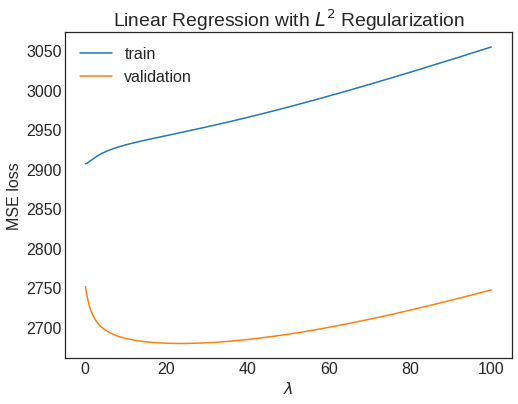

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(lambda_list, train_loss, label='train')
plt.plot(lambda_list, val_loss, label='validation')
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE loss')
#plt.xscale('log')
plt.title(r'Linear Regression with $L^2$ Regularization')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/linear_regression_regularization.pdf')
plt.show()

In [ ]:
lambda_list_inv = np.exp(np.linspace(np.log(0.01), np.log(0.5), 1000))
train_loss = []
val_loss = []

## for each lambda value, fit a new model
for i in range(len(lambda_list)):
    ## fit the model
    model = Ridge(alpha=1/lambda_list_inv[i])
    model.fit(X_train, y_train)

    ## record losses
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    val_loss.append(mean_squared_error(y_val, model.predict(X_val)))

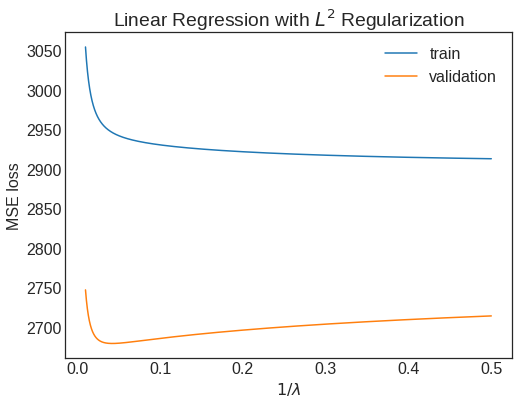

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(lambda_list_inv, train_loss, label='train')
plt.plot(lambda_list_inv, val_loss, label='validation')
plt.xlabel(r'$1/\lambda$')
plt.ylabel('MSE loss')
#plt.xscale('log')
plt.title(r'Linear Regression with $L^2$ Regularization')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/linear_regression_regularization.pdf')
plt.show()